In [16]:
import pandas as pd

In [17]:
df = pd.read_pickle('data/tifu_cleaned.pkl')
df.head()

,ups,num_comments,upvote_ratio,score,documents_lem,tldr_lem,title_lem
0,115.0,23.0,0.88,115.0,actual happen coupl year ago grow germani go g...,confus th grade girl boy front half class kid ...,genderstereotyp
1,16.0,12.0,0.79,16.0,last octob 'm feel fallout mom die cancer last...,found estrang dad thought love get know get kn...,tell dad love
2,55.0,10.0,0.85,55.0,brilliant idea use veet hair remov gel ol ' da...,ball burn sauron left deveet,deveet
3,90.0,20.0,0.92,90.0,go bath long day paint kid face carniv would g...,peppermint bath burn cold ladybit,want pepperminti bath
4,81.0,18.0,0.79,81.0,n't bath practic year final move hous bath dec...,get high hot bath almost cook like lobster,spliff bath


In [4]:
from wordcloud import WordCloud

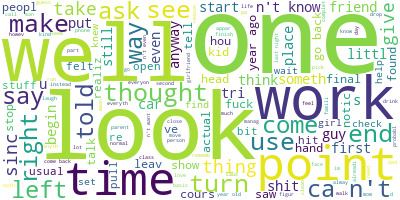

In [19]:
# Create word cloud of documents_stemmed

# Create a WordCloud object
long_string = ','.join(list(df['documents_lem'].values))

# Generate a word cloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Visualize the word cloud
wordcloud.generate(long_string)
wordcloud.to_image()

In [20]:
# Define function to plot most common words from specific column

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def plot_10_most_common_words(count_data, count_vectorizer, col_name_title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words' + col_name_title)
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words

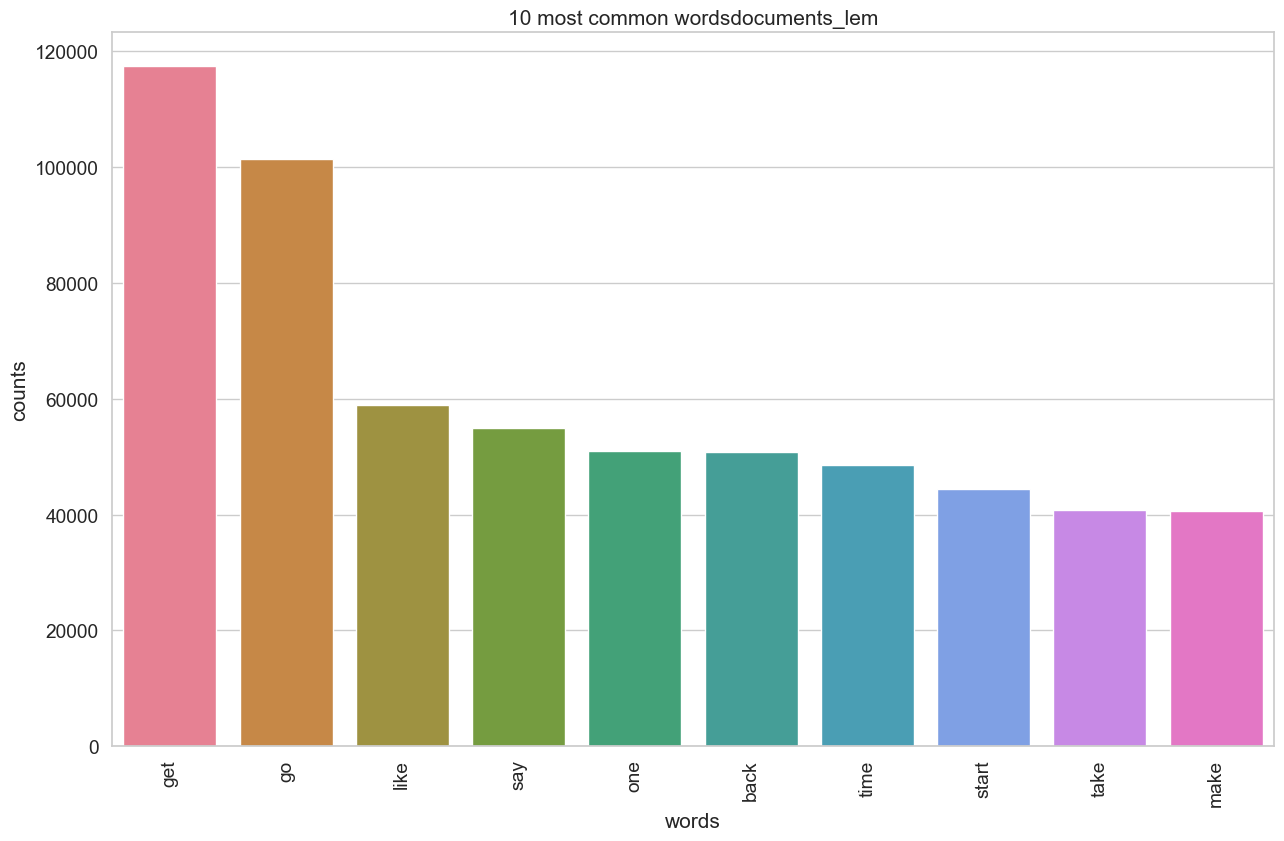

In [21]:
# Plot the 10 most common words for documents_stemmed

count_vectorizer = CountVectorizer() # Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['documents_lem'])# Visualise the 10 most common words

plot_10_most_common_words(count_data, count_vectorizer, "documents_lem")

In [9]:
print(count_data)

  (0, 598)	1
  (0, 32688)	1
  (0, 15735)	1
  (0, 90452)	4
  (0, 1216)	1
  (0, 31095)	1
  (0, 29493)	2
  (0, 88091)	2
  (0, 29490)	2
  (0, 68717)	1
  (0, 68107)	3
  (0, 78697)	7
  (0, 30725)	5
  (0, 75291)	2
  (0, 71374)	1
  (0, 12178)	2
  (0, 51607)	6
  (0, 2685)	4
  (0, 27455)	4
  (0, 13815)	1
  (0, 576)	3
  (0, 18068)	1
  (0, 78045)	1
  (0, 39498)	1
  (0, 30735)	2
  :	:
  (42137, 14120)	1
  (42137, 60094)	1
  (42137, 59204)	1
  (42137, 3163)	2
  (42137, 26165)	1
  (42137, 14314)	1
  (42137, 82050)	1
  (42137, 57277)	1
  (42137, 24228)	1
  (42137, 20843)	1
  (42137, 82246)	1
  (42137, 85220)	1
  (42137, 48526)	1
  (42137, 64991)	1
  (42137, 3601)	1
  (42137, 83984)	1
  (42137, 18465)	1
  (42137, 25450)	1
  (42137, 42031)	1
  (42137, 62957)	1
  (42137, 58925)	1
  (42137, 86109)	1
  (42137, 65530)	1
  (42137, 32915)	1
  (42137, 73244)	1
